<a href="https://colab.research.google.com/github/iamakashpatel1/Api-Satellite/blob/master/PyTorch_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


# Data Preparing and loading

Machine learning is a game of two parts:
1. Turn data into numerical representation.
2. Build a model to learn patterns based on that numerical representation

In [2]:
# We'll use a linear regression formula to make a straight line with known parameters (w & a)
weight = 0.7 #slope(m or b)
bias = 0.3 # intercept(c or a)

# At first we have this above data but we gona build a model which will estimate the ideal (w & a)

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
# finding a relation between x and y is basically called machine learning

x[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# splitting data into training and testing set.

# creating training/testing split
train_split = int(0.8 * len(x))
train_split

40

In [4]:
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [5]:
# Now better way to see data is to visualize.
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=( 10,7))

  #plot train data
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')

  #plot test data
  plt.scatter(test_data,test_labels,c='g',s=4, label='Testing data')

  # Are there any predictions?
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

    # show legend
    plt.legend(prop={'size':14})

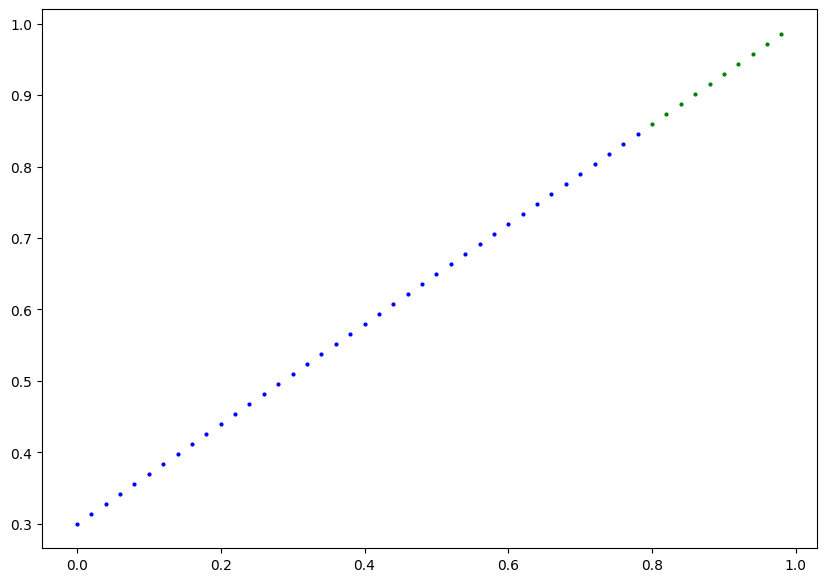

In [6]:
plot_predictions()

#2. Building a model

In [7]:
# Creating linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
#Parameter
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self,x:torch.Tensor) ->torch.Tensor: # x is input data
    return self.weights * x + self.bias

In [8]:
 # Creating random seed
torch.manual_seed(42)

# creating our model instance
model_0 = LinearRegressionModel()

#checking parameter
list(model_0.parameters())

# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# Now we need to make our weights and bias as close as ideal value of weights and bias


In [10]:
### checking how well can the model predict right now using y_test and x_test data (the 20% data which we have left to check or test the model)
## When we pass this testing data through our model, it,s going to run it through the forward() method
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

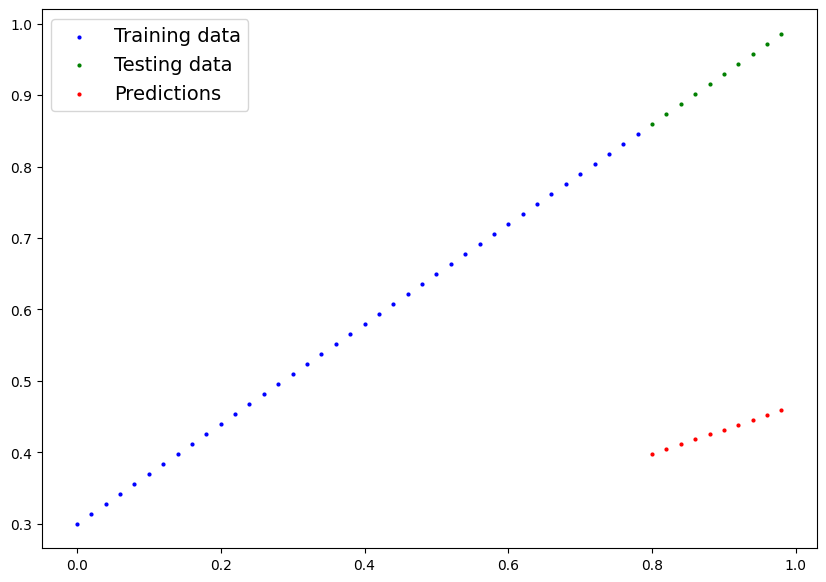

In [11]:
# graphing the tested value
plot_predictions(predictions=y_preds)

# 3. Training Model
moving from unknown (w & a) to ideal (w & a) so that the red like meets to the straight line.

1. setting loss function
2. setting optimizer

and specially for PyTorch, we need
. A training loop
. A testing loop

In [12]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer. Decrease the parameters (w & a) by learning rate (lr)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [13]:
## Building a training loop and testing loop in PyTorch
# Step need to train the model


In [14]:
# An epoch is one loop through the data...
epochs = 100

# Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  # forward pass . In training we use the x_traing data set not the x_test
  y_pred = model_0(x_train)

  # Calculate the loss . Here we find the loss of gradient or slope by comparing .
  loss = loss_fn(y_pred,y_train)

  # Optimizer zero grad. This reset the new value of (w & a) after loss
  optimizer.zero_grad()

  # Perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  # Step the optimizer (perform gradient descent)
  optimizer.step()


## Testing
  model_0.eval() #turn off the model from training mode

  with torch.inference_mode():
    test_pred =model_0(x_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

    print(model_0.state_dict())








Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [16]:

# Making some prediction
with torch.inference_mode():
  y_preds_new = model_0(x_test)


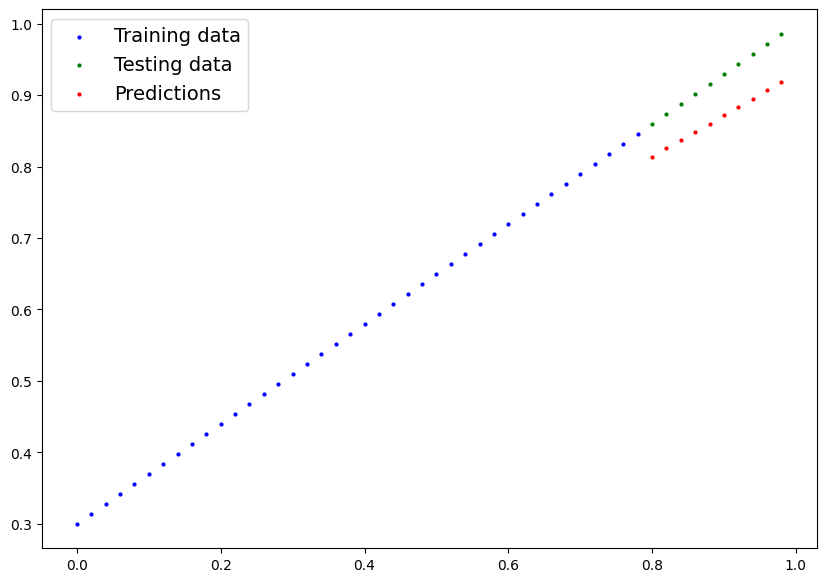

In [17]:
plot_predictions(predictions=y_preds_new)

# Saving and restoring the Model in PyTorch

1. torch.save() -allows you save PyTorch object in python's pickle format
2. torch.load() - allow you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() -this allows to load a model's saved state dictionary


In [18]:
 # Saving our PyTorch model
from pathlib import Path

#1 Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2 Create model save path
MODEL_NAME = 'PyTorch_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# Save the model in state_dict()
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


# Loading PyTorch model

In [19]:
# Loading PyTorch model
# Since we saved our model's state_dict() rather then entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [20]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>